# This notebook shows you how to sharpen the 20m bands from the Sentinel 2 satellite using the s2super model.

In [ ]:
!wget -nc -q https://github.com/casperfibaek/super_res_s2/raw/main/example_data/s2_10m.tif
!pip install s2super --upgrade

In [1]:
import numpy as np
import buteo as beo
from matplotlib import pyplot as plt
from s2super import predict, get_s2super_model

plt.rcParams['figure.figsize'] = (20, 16)

In [2]:
# Load all sentinel 2 bands, set nodata to 0
s2_data = beo.raster_to_array("/content/s2_10m.tif").filled(0)

# B2, B3, B4, B8, B5, B6, B7, B8A, B11, B12
#  0   1   2   3   4   5   6    7    8    9
# Load B12, normalise by 10000, add channel
b12 = (s2_data[:, :,  9][:, :, np.newaxis] / 10000.0).astype("float32")
b8a = (s2_data[:, :,  7][:, :, np.newaxis] / 10000.0).astype("float32")
b05 = (s2_data[:, :,  4][:, :, np.newaxis] / 10000.0).astype("float32")

# Load RGB bands, normalise by 10000, channel already added due to slice.
rgb = (s2_data[:, :, 0:3] / 10000.0).astype("float32")

# Clear memory
s2_data = None

In [3]:
# Get the super model. Not recessary if using the super_sample (all bands) function instead of predict (single band)
model = get_s2super_model()

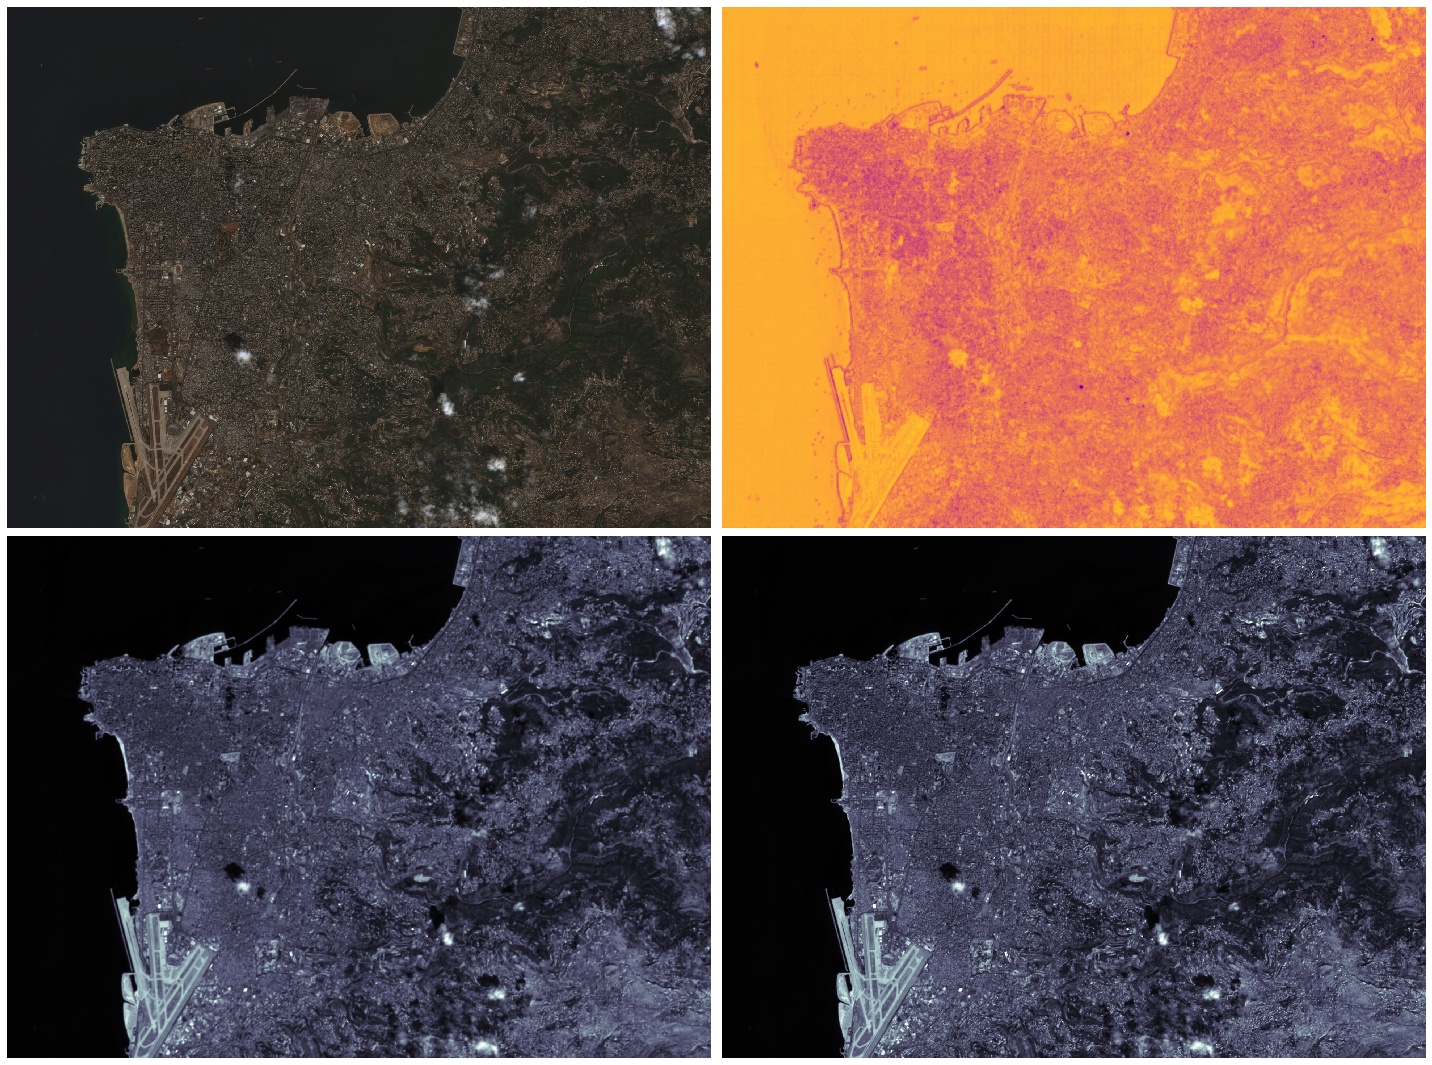

In [4]:
# Predict a sharp version of band 12
b12_sharp, confidence = predict(model, [b12, rgb], b12, output_confidence=True, number_of_offsets=9, merge_method="mad", merge_weights="conf")

# Plot the results.
fig, axs = plt.subplots(nrows=2, ncols=2)
ax_top, ax_bot = axs
top_left, top_right = ax_top
bot_left, bot_right = ax_bot

# RGB top-left
top_left.imshow(np.clip(rgb[:, :, ::-1], 0.0, 1.0), vmin=0.1, vmax=0.55, interpolation="nearest"); top_left.axis("off")
# Confidence top-right
top_right.imshow(confidence[:, :, 0], vmin=0.0, vmax=1.0, interpolation="nearest", cmap="plasma"); top_right.axis("off")

# B12 unsharp bottom-left
bot_left.imshow(b12[:, :, 0], vmin=0.1, vmax=0.7, interpolation="nearest", cmap="bone"); bot_left.axis("off")
# B12 sharp bottom right
bot_right.imshow(b12_sharp[:, :, 0], vmin=0.1, vmax=0.7, interpolation="nearest", cmap="bone"); bot_right.axis("off")

# Display and save results
fig.subplots_adjust(hspace=-0.1)
plt.tight_layout()
plt.savefig('b12_130dpi_zoomout.png', bbox_inches='tight', dpi=130)

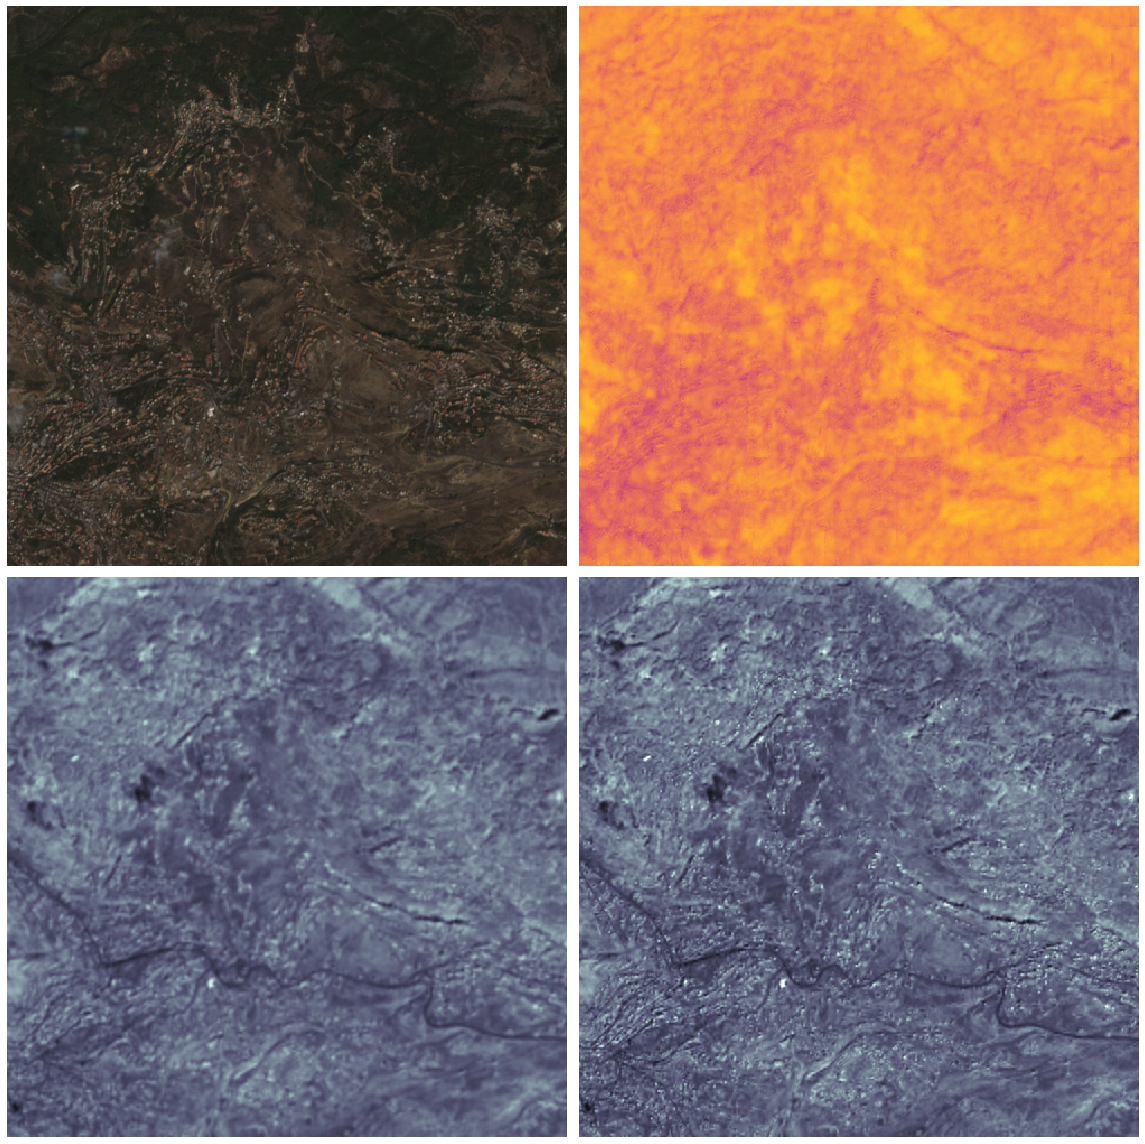

In [5]:
# Predict a sharp version of band 8A
b8a_sharp, confidence = predict(model, [b8a, rgb], b8a, output_confidence=True, number_of_offsets=9, merge_method="mad", merge_weights="conf")

# Plot the results.
fig, axs = plt.subplots(nrows=2, ncols=2)
ax_top, ax_bot = axs
top_left, top_right = ax_top
bot_left, bot_right = ax_bot

# RGB top-left
top_left.imshow(np.clip(rgb[-500:, -500:, ::-1], 0.0, 1.0), interpolation="nearest"); top_left.axis("off")
# Confidence top-right
top_right.imshow(confidence[-500:, -500:, 0], vmin=0.0, vmax=1.0, interpolation="nearest", cmap="plasma"); top_right.axis("off")

# B12 unsharp bottom-left
bot_left.imshow(b8a[-500:, -500:, 0], vmin=0.1, vmax=0.7, interpolation="nearest", cmap="bone"); bot_left.axis("off")
# B12 sharp bottom right
bot_right.imshow(b8a_sharp[-500:, -500:, 0], vmin=0.1, vmax=0.7, interpolation="nearest", cmap="bone"); bot_right.axis("off")

# Display and save results
fig.subplots_adjust(hspace=-0.1, wspace=-0.5)
plt.tight_layout()
plt.savefig('b8a_130dpi_zoomin_1.png', bbox_inches='tight', dpi=130)

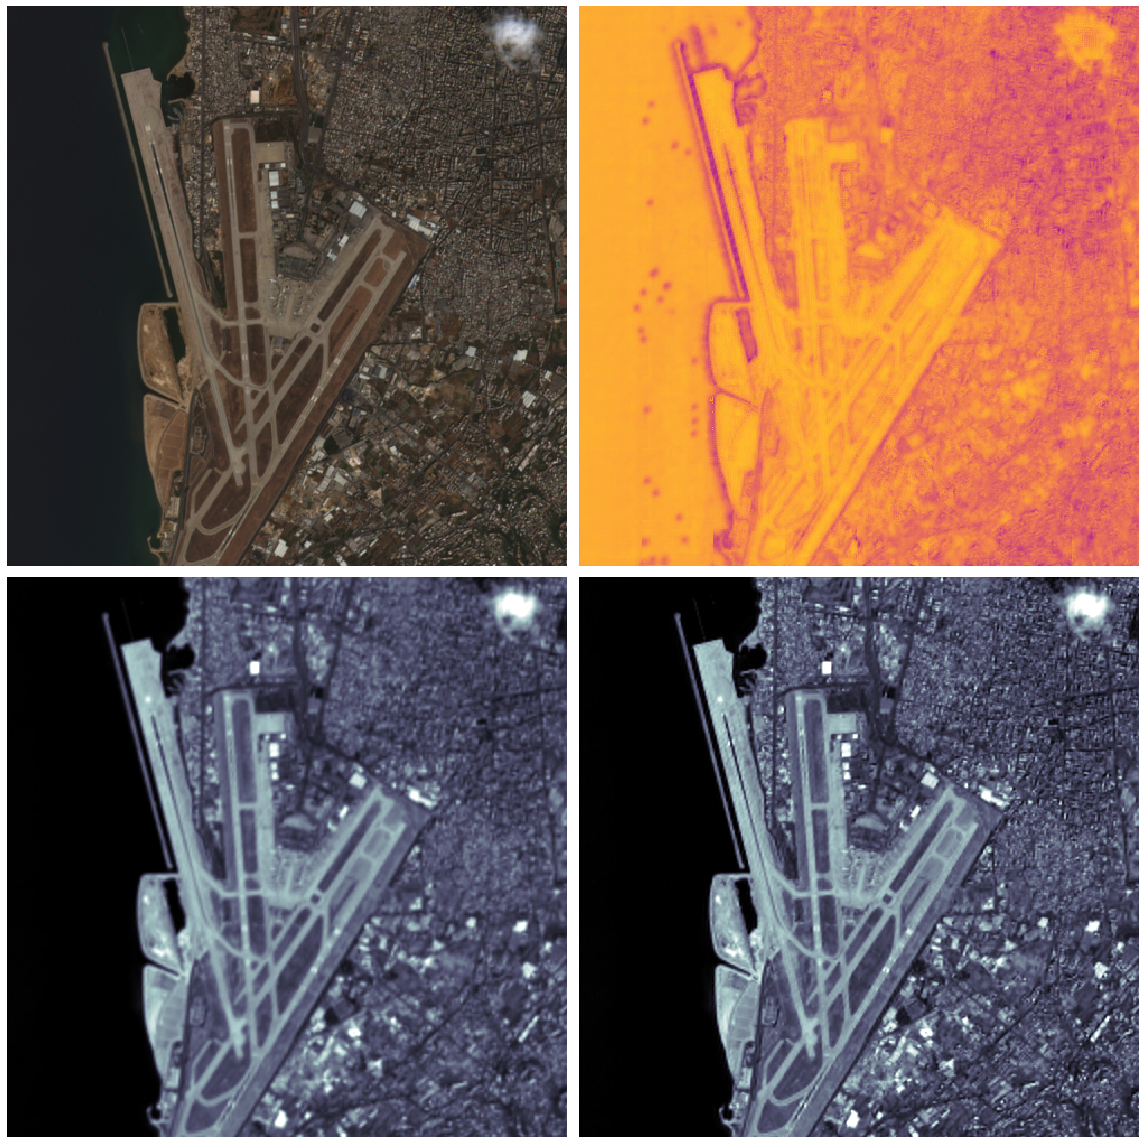

In [7]:
# Predict a sharp version of band 5
b05_sharp, confidence = predict(model, [b05, rgb], b05, output_confidence=True, number_of_offsets=9, merge_method="mad", merge_weights="conf")

# Plot the results.
fig, axs = plt.subplots(nrows=2, ncols=2)
ax_top, ax_bot = axs
top_left, top_right = ax_top
bot_left, bot_right = ax_bot

# RGB top-left
top_left.imshow(np.clip(rgb[-500:, 200:700, ::-1], 0.0, 1.0), vmin=0.1, vmax=0.5, interpolation="nearest"); top_left.axis("off")
# Confidence top-right
top_right.imshow(confidence[-500:, 200:700, 0], vmin=0.0, vmax=1.0, interpolation="nearest", cmap="plasma"); top_right.axis("off")

# B12 unsharp bottom-left
bot_left.imshow(b05[-500:, 200:700, 0], vmin=0.1, vmax=0.7, interpolation="nearest", cmap="bone"); bot_left.axis("off")
# B12 sharp bottom right
bot_right.imshow(b05_sharp[-500:, 200:700, 0], vmin=0.1, vmax=0.7, interpolation="nearest", cmap="bone"); bot_right.axis("off")

# Display and save results
fig.subplots_adjust(hspace=-0.1, wspace=-0.5)
plt.tight_layout()
plt.savefig('b05_130dpi_zoomin_2.png', bbox_inches='tight', dpi=130)